来源：[b站刘二大人](https://www.bilibili.com/video/BV1Y7411d7Ys)
# 1. prepare dataset

In [1]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
 
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])
 
train_dataset = datasets.MNIST(root='./dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='./dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# 2. design model using class

In [2]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Conv2d 三个参数分别是输入通道数、输出通道数，卷积核大小
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)
 
 
    def forward(self, x):
        # flatten data from (n,1,28,28) to (n, 784)
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size, -1) # -1 此处自动算出的是320
        x = self.fc(x)
 
        return x
 
 
model = Net()

# 3. construct loss and optimizer

In [3]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

print(model)
print("conv1_weight: ", model.conv1.weight.shape)
print("conv2_bias: ", model.conv1.bias.shape)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)
conv1_weight:  torch.Size([10, 1, 5, 5])
conv2_bias:  torch.Size([10])


# 4. training cycle forward, backward, update

In [4]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        optimizer.zero_grad()
 
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
ACC = []
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy on test set: %d %% ' % (100*correct/total))
    ACC.append(100*correct/total)
 
EPOCH = 10
if __name__ == '__main__':
    for epoch in range(EPOCH):
        train(epoch)
        test()

[1,   300] loss: 0.656
[1,   600] loss: 0.191
[1,   900] loss: 0.146
accuracy on test set: 96 % 
[2,   300] loss: 0.118
[2,   600] loss: 0.102
[2,   900] loss: 0.088
accuracy on test set: 97 % 
[3,   300] loss: 0.083
[3,   600] loss: 0.078
[3,   900] loss: 0.074
accuracy on test set: 97 % 
[4,   300] loss: 0.070
[4,   600] loss: 0.062
[4,   900] loss: 0.064
accuracy on test set: 98 % 
[5,   300] loss: 0.054
[5,   600] loss: 0.061
[5,   900] loss: 0.055
accuracy on test set: 98 % 
[6,   300] loss: 0.051
[6,   600] loss: 0.052
[6,   900] loss: 0.050
accuracy on test set: 98 % 
[7,   300] loss: 0.047
[7,   600] loss: 0.048
[7,   900] loss: 0.042
accuracy on test set: 98 % 
[8,   300] loss: 0.042
[8,   600] loss: 0.043
[8,   900] loss: 0.041
accuracy on test set: 98 % 
[9,   300] loss: 0.040
[9,   600] loss: 0.037
[9,   900] loss: 0.040
accuracy on test set: 98 % 
[10,   300] loss: 0.037
[10,   600] loss: 0.039
[10,   900] loss: 0.035
accuracy on test set: 98 % 


# 5. show ACC_EPOCH

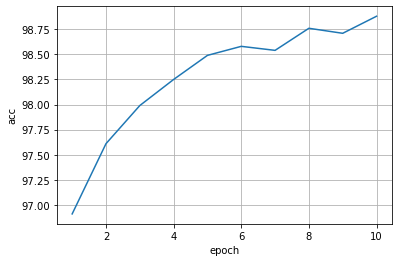

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_epoch = np.arange(1, EPOCH + 1)
plt.plot(x_epoch, ACC)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid()
plt.show()